<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовавание-парметров" data-toc-modified-id="Исследовавание-парметров-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовавание парметров</a></span></li><li><span><a href="#Выбросы-и-редкие-значения" data-toc-modified-id="Выбросы-и-редкие-значения-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выбросы и редкие значения</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-имеющимся-данным:" data-toc-modified-id="Вывод-по-имеющимся-данным:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод по имеющимся данным:</a></span></li></ul></li><li><span><a href="#Исследовавание-времени-продажи" data-toc-modified-id="Исследовавание-времени-продажи-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследовавание времени продажи</a></span></li><li><span><a href="#Влияние-факторов-на-стоимость-квартиры" data-toc-modified-id="Влияние-факторов-на-стоимость-квартиры-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Влияние факторов на стоимость квартиры</a></span></li><li><span><a href="#Топ-10-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Топ-10-населённых-пунктов-с-наибольшим-числом-объявлений-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Топ-10 населённых пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Определение-центра-Санкт-Петербурга" data-toc-modified-id="Определение-центра-Санкт-Петербурга-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Определение центра Санкт-Петербурга</a></span></li><li><span><a href="#Анализ-квартир-в-центре" data-toc-modified-id="Анализ-квартир-в-центре-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Анализ квартир в центре</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.



## Изучение данных из файла

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

1. Проблема со столбцом first_day_exposition - не в формате дататайм.
3. Проблема со столбцом floors_total - не в формате int и пропуски, логичной замены нет.
5. Пропущены значения в столбце is_apartment логичная замена - false.
6. Пропущены значения в столбцах: kitchen_area, living_area, ceiling_height, airports_nearest, parks_nearest, ponds_nearest, parks_around3000, ponds_around3000, days_exposition. Логичной замены пропущенным значениям нет.
7. Пропущены значения в столбце balcony логичная замена - 0.
8. Пропущены значения в столбце locality_name, критично - удалить строки.
9. Проблема со столбцом cityCenters_nearest, не в змеином регистре, пропущены значения. Логичной замены нет.

## Предобработка данных

In [ ]:
df = df.dropna(subset=['locality_name']).reset_index(drop=True)
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')

df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(False)
df['floors_total'] = df['floors_total'].fillna(0).astype('int')
df['days_exposition'] = df['days_exposition'].fillna(0).astype(int)

## Расчёты и добавление результатов в таблицу

In [ ]:
# Цена за 1 квадрат
df['price_meter'] = df['last_price'] / df['total_area']
# Соотношение жилой площади к общей
df['ratio_living'] = df['living_area'] / df['total_area']
# Соотношение кухни к общей площади
df['ratio_kitchen'] = df['kitchen_area'] / df['total_area']

# День недели, месяц, год публикации
df['publication_day_week'] = df['first_day_exposition'].dt.weekday
df['publication_month'] = df['first_day_exposition'].dt.month
df['publication_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

# Распределение по этажам
df['floor_distribution'] = df.apply(
    lambda row:'Первый' if row['floor'] == 1 else
    ('Последний' if row['floor'] == row['floors_total'] else 'Другой'),
    axis=1)


## Исследовавание парметров

array([[<AxesSubplot:title={'center':'price_meter'}>]], dtype=object)

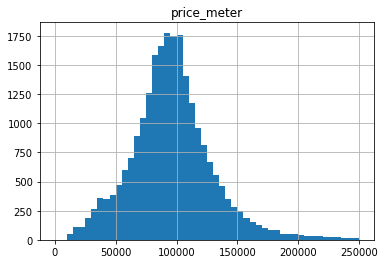

In [ ]:
# Исследование цены за кв.метр
df.hist('price_meter', bins=50, range=(0,250000))

array([[<AxesSubplot:title={'center':'ratio_living'}>]], dtype=object)

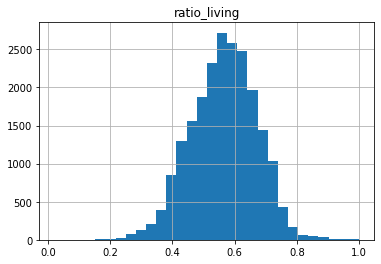

In [ ]:
# Исследование cоотношения жилой площади к общей
df.hist('ratio_living', bins=30)

array([[<AxesSubplot:title={'center':'ratio_kitchen'}>]], dtype=object)

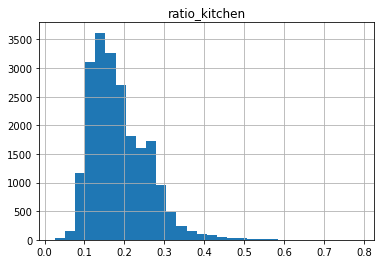

In [ ]:
# Исследование cоотношения площади кухни к общей
df.hist('ratio_kitchen', bins=30)

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

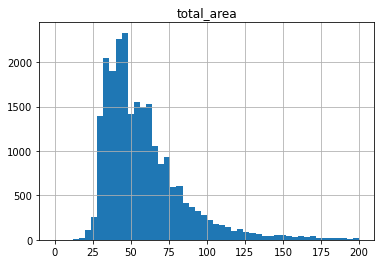

In [ ]:
# Исследование общей площади
df.hist('total_area', bins=50, range=(0,200))

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

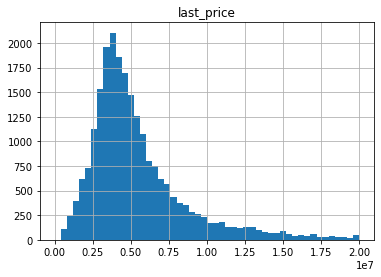

In [ ]:
# Исследование цены продажи
df.hist('last_price', bins=50, range=(0,20000000))

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

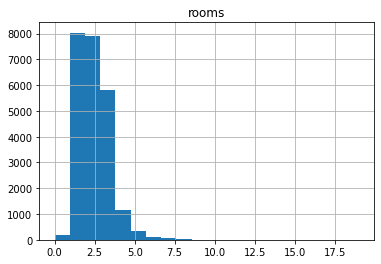

In [ ]:
# Исследование количества комнат
df.hist('rooms', bins=20)

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

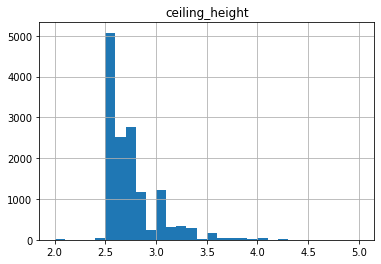

In [ ]:
# Исследование высоты потолков
df.hist('ceiling_height', bins=30, range=(2,5))

1. Цена за квадратный метр средняя (медианная) в районе 100 000
2. Отношение жилой площади к общей в среднем 0.6
3. Отношение площади кухни к обшей в среднем 0.15
4. Общая площадь в среднем 45кв
5. Средняя цена за квартиру в районе 3млн
6. Среднее количество комнат 2
7. Средняя высота потолков 2,5 метра


## Выбросы и редкие значения

<AxesSubplot:ylabel='Frequency'>

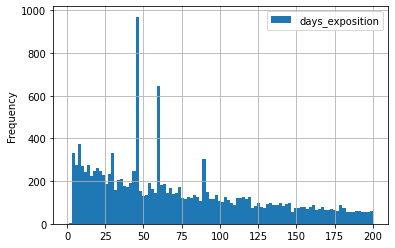

In [ ]:
df.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1,200))

In [ ]:
df['days_exposition'].value_counts()

0       3180
45       879
60       538
7        234
30       208
        ... 
1112       1
1080       1
1064       1
1032       1
1391       1
Name: days_exposition, Length: 1142, dtype: int64

Странные пики на 7, 30, 45, 60, 90.
Скорее всего это выборсы (вероятно что объявления автоматически закрываются в эти дни)

In [ ]:
#  Иначе никак
df['days_exposition'] = df['days_exposition'].fillna(0).astype(int)

good_df = df.query('days_exposition != 0 and days_exposition != 7 and days_exposition != 30 and \
                    days_exposition != 45 and days_exposition != 60 and days_exposition != 90')

<AxesSubplot:ylabel='Frequency'>

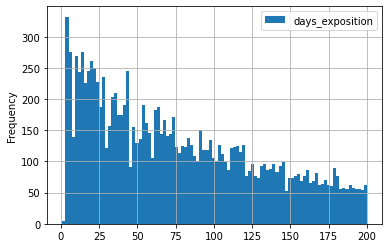

In [ ]:
good_df.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1,200))

<AxesSubplot:ylabel='Frequency'>

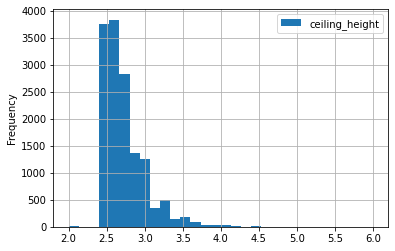

In [ ]:
df.plot(y='ceiling_height', kind='hist', bins=30, grid=True, range=(2,6))

In [ ]:
good_df = df.query('2.50 < ceiling_height and ceiling_height < 3.5')

<AxesSubplot:ylabel='Frequency'>

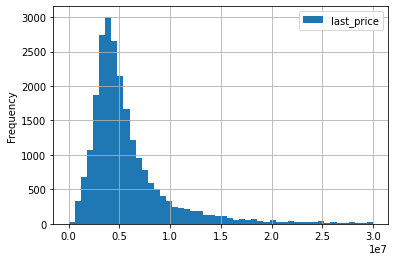

In [ ]:
df.plot(y='last_price', kind='hist', bins=50, grid=True, range=(0, 30000000))

In [ ]:
good_df = df.query('1800000 < last_price and last_price < 15000000')

<AxesSubplot:ylabel='Frequency'>

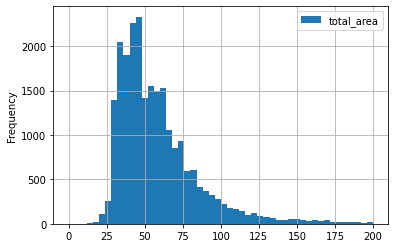

In [ ]:
df.plot(y='total_area', kind='hist', bins=50, grid=True, range=(0, 200))

In [ ]:
good_df = df.query('20 < total_area and total_area < 150')

### Вывод по имеющимся данным:
1. Обычно продажа квартиры занимает 114 дней.
2. Слишком быстрая прожада - до 44 дней.
3. Слишком долгая продажа - больше 258 дня.

In [ ]:
good_df = good_df.query('44 < days_exposition < 258')

## Исследовавание времени продажи

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

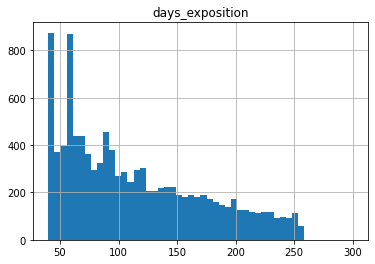

In [ ]:
good_df.hist(column='days_exposition', bins=50, range=(40,300))

In [ ]:
# print(f'Среднее количество дней продажи квартиры {good_df['days_exposition'].mean():.0f}') - SyntaxError: invalid syntax

days_exposition_mean = good_df['days_exposition'].mean()
days_exposition_median = good_df['days_exposition'].median()

print(f'Среднее количество дней продажи квартиры: {days_exposition_mean:.0f}')
print(f'Медианное количество дней продажи квартиры: {days_exposition_median:.0f}')

Среднее количество дней продажи квартиры: 114
Медианное количество дней продажи квартиры: 99


## Влияние факторов на стоимость квартиры

In [ ]:
price_taria = good_df['last_price'].corr(good_df['total_area'])
price_rooms = good_df['last_price'].corr(good_df['rooms'])
price_centers_nearest = good_df['last_price'].corr(good_df['city_centers_nearest'])

print(f'Зависимость цены от общей площади состовляет: {price_taria:.2f}')
print(f'Зависимость цены от числа комнат состовляет: {price_rooms:.2f}')
print(f'Зависимость цены от удаленности от центра: {price_centers_nearest:.2f}')

Зависимость цены от общей площади состовляет: 0.69
Зависимость цены от числа комнат состовляет: 0.41
Зависимость цены от удаленности от центра: -0.31


1. Сильная зависимость цены от общей площади.
2. Слабая зависимость цены от числа комнат.
3. Слабая зависимость от удаленности от центра.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

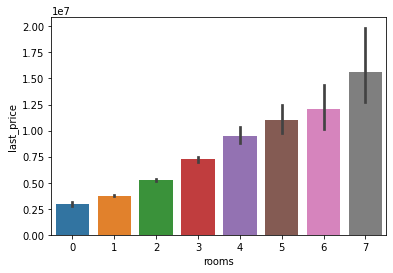

In [ ]:
sns.barplot(x='rooms', y='last_price', data=good_df)

<AxesSubplot:xlabel='floor_distribution', ylabel='last_price'>

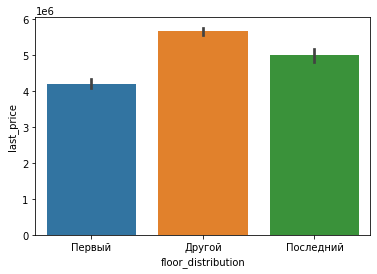

In [ ]:
sns.barplot(x='floor_distribution', y='last_price', data=good_df)

<AxesSubplot:xlabel='publication_day_week', ylabel='last_price'>

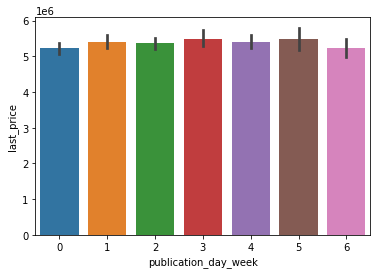

In [ ]:
sns.barplot(x='publication_day_week', y='last_price', data=good_df)

<AxesSubplot:xlabel='publication_month', ylabel='last_price'>

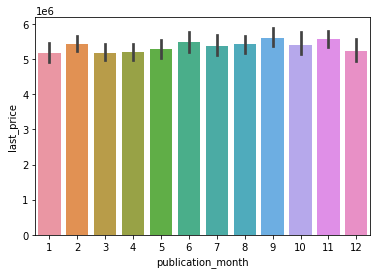

In [ ]:
sns.barplot(x='publication_month', y='last_price', data=good_df)

<AxesSubplot:xlabel='publication_year', ylabel='last_price'>

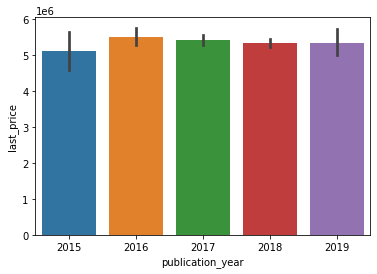

In [ ]:
sns.barplot(x='publication_year', y='last_price', data=good_df)

1. Самый дорогой квадратный метр в 12-ти комнотной квартире (наверное это коммуналка)
2. На среднех этажах цена квадратного метра значительно выше. Самая низкая цена квадрата на первом.
3. День недели размещения обхявления никак не влияет на стоимость квадратного метра.
4. Месяц размещения так же не влияет на стоимость квадратного метра
5. Квардатрный метр стабильно растет на протяжении последних 5 лет. Или рубль дешевеет?

## Топ-10 населённых пунктов с наибольшим числом объявлений


In [ ]:
for local in list(dict(good_df['locality_name'].value_counts().head(10)).keys()):
    data = good_df.query('locality_name == @local')
    mean_price_meatr = data['price_meter'].mean()
    print(f'Средняя стоимость квадратного метра в {local} ровна {mean_price_meatr:.0f}')

Средняя стоимость квадратного метра в Санкт-Петербург ровна 109430
Средняя стоимость квадратного метра в посёлок Мурино ровна 85468
Средняя стоимость квадратного метра в посёлок Шушары ровна 78540
Средняя стоимость квадратного метра в Всеволожск ровна 67506
Средняя стоимость квадратного метра в Колпино ровна 74198
Средняя стоимость квадратного метра в посёлок Парголово ровна 88714
Средняя стоимость квадратного метра в Пушкин ровна 99799
Средняя стоимость квадратного метра в деревня Кудрово ровна 92632
Средняя стоимость квадратного метра в Гатчина ровна 67280
Средняя стоимость квадратного метра в Выборг ровна 56638


1. Самая высокая стоимость жилья в Санкт-Петербурге
2. Самая низкая стоимость жилья в Выборге

## Определение центра Санкт-Петербурга

/tmp/ipykernel_98/1267993139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['city_centers_nearest_km'] = good_df['city_centers_nearest'] / 1000


<AxesSubplot:xlabel='city_centers_nearest_km'>

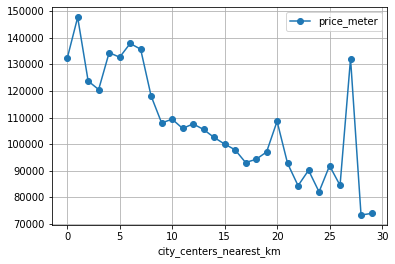

In [ ]:
spb = good_df.query('locality_name == "Санкт-Петербург"')
spb['city_centers_nearest_km'] = good_df['city_centers_nearest'] / 1000
spb = spb.dropna(subset=['city_centers_nearest_km']).reset_index(drop=True)
spb['city_centers_nearest_km'] = spb['city_centers_nearest_km'].astype(int)

spb.pivot_table(index='city_centers_nearest_km', values='price_meter', aggfunc='mean').plot(style='o-', grid=True)

 10 км от центра входит в центр Санкт-Петербурга.

## Анализ квартир в центре

In [ ]:
spb_center = spb.query('city_centers_nearest_km < 10')

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

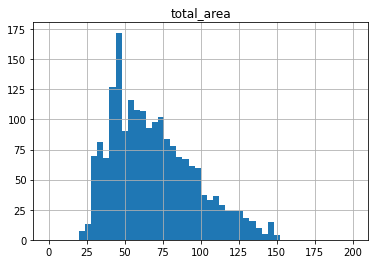

In [ ]:
spb_center.hist('total_area', bins=50, range=(0,200))

array([[<AxesSubplot:title={'center':'price_meter'}>]], dtype=object)

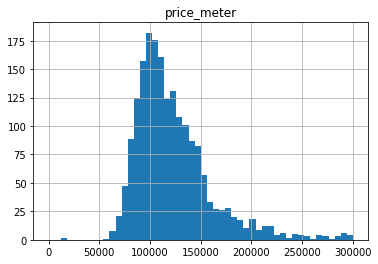

In [ ]:
spb_center.hist('price_meter', bins=50, range=(0, 300000))
#spb_center.pivot_table(index='price_meter', values='').plot()

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

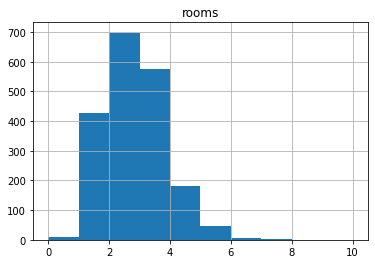

In [ ]:
spb_center.hist('rooms', bins=10, range=(0,10))

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

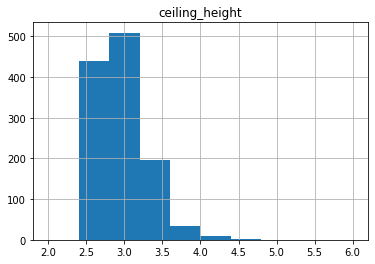

In [ ]:
spb_center.hist('ceiling_height', range=(2,6))

<AxesSubplot:xlabel='rooms', ylabel='price_meter'>

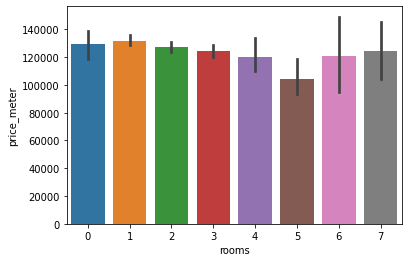

In [ ]:
sns.barplot(x='rooms', y='price_meter', data=spb_center)

<AxesSubplot:xlabel='floor_distribution', ylabel='price_meter'>

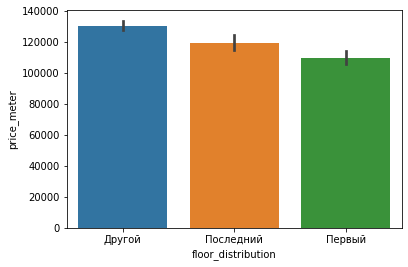

In [ ]:
sns.barplot(x='floor_distribution', y='price_meter', data=spb_center)

<AxesSubplot:xlabel='city_centers_nearest_km', ylabel='price_meter'>

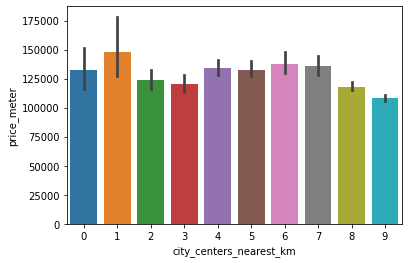

In [ ]:
sns.barplot(x='city_centers_nearest_km', y='price_meter', data=spb_center)

<AxesSubplot:xlabel='publication_day_week', ylabel='price_meter'>

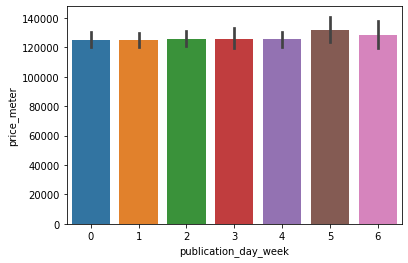

In [ ]:
sns.barplot(x='publication_day_week', y='price_meter', data=spb_center)

<AxesSubplot:xlabel='publication_month', ylabel='price_meter'>

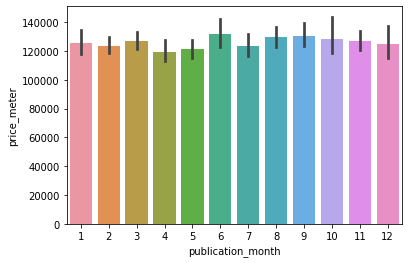

In [ ]:
sns.barplot(x='publication_month', y='price_meter', data=spb_center)

<AxesSubplot:xlabel='publication_year', ylabel='price_meter'>

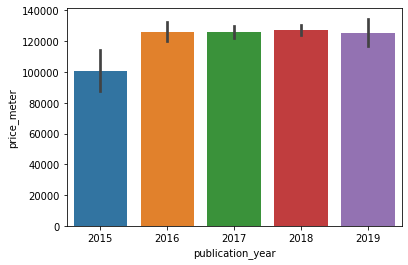

In [ ]:
sns.barplot(x='publication_year', y='price_meter', data=spb_center)

1. Средняя площадь квартиры в центре так же состовляет 45 метров
2. Средняя стоимость квадратного метра так же близка к 140 000 рублей за квдарат
3. Высота потолка в среднем 3 метра
4. Самый дорогой квадратный метр в 12 комнатной квартире.
5. Самый дешевый квадратный метр на первых этажах, самый дорогой на среднем.
6. Первые 2 км от центра самые дорогие
7. Цена квадрата не зависит от дня недели публикации.
8. В Апреле самый дорогой квадратный метр.
9. Заметен рост цены квадратного метра в 16 году и в 19.

## Общий вывод

Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. Изучая время продажи квартир мы выявили, что большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались. Мы выявили при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 45 до 250 дней. Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру, год размещения. Незначительно на стоимость квадратного метра влияют день, месяц и общая площадь. Нужно учитывать, что в 2016-2017 годах стоимость квартир в среднем по рынку была ниже на 10-20 %, тогда как в центре Санкт-Петербурга данной зависимости от года не обнаружено. В данном случае имело место постоянное удорожание стоимости, начиная с 2015 года по текущий момент. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 10 километров.

Также важно учитывать, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели по рынку в целом. Т.е. возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному. Т.е. например в то время, когда средняя стоимость метра по рынку в 2016-2017 годах была наиболее низкой, какие-то аналогичные прошлым годам квартиры могли и не падать в цене, а наоборот дорожать! Именно об этом нам и говорят данные, полученные при изучении единственного сегмента квартир - находящихся в радиусе 10 км в центре СПБ.